In [5]:
import os
os.system('pip install xgboost')

0

In [1]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

[12:43:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[12:43:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[12:43:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12:43:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12:43:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[12:43:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12:43:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [15]:
import numpy as np
min(y), max(y), np.mean(y)

(5.0, 50.0, 22.532806324110677)

In [12]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

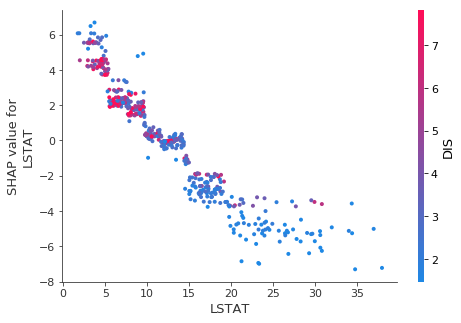

In [45]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("LSTAT", shap_values, X)

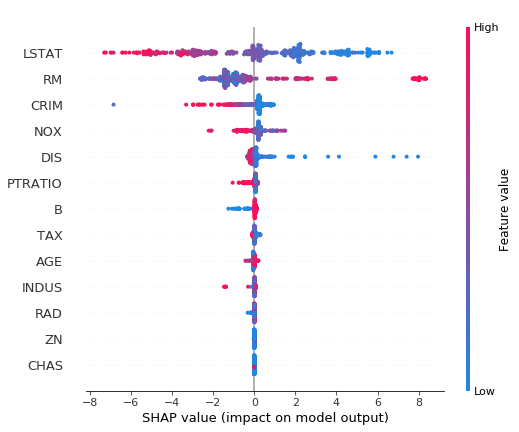

In [46]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

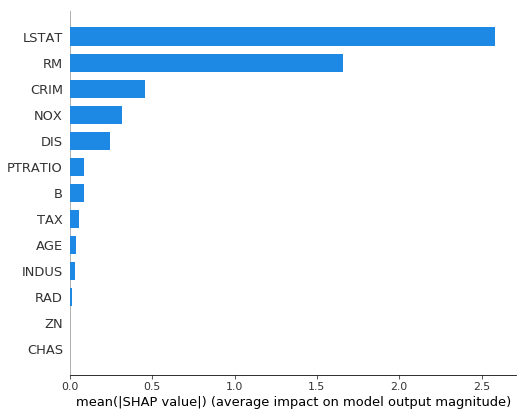

In [47]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [52]:
import shap
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

Using TensorFlow backend.


ImportError: No module named tensorflow

In [55]:
import SocketServer

class MyTCPHandler(SocketServer.BaseRequestHandler):
    """
    The request handler class for our server.

    It is instantiated once per connection to the server, and must
    override the handle() method to implement communication to the
    client.
    """

    def handle(self):
        # self.request is the TCP socket connected to the client
        self.data = self.request.recv(1024).strip()
        print "{} wrote:".format(self.client_address[0])
        print self.data
        # just send back the same data, but upper-cased
        self.request.sendall(self.data.upper())

if __name__ == "__main__":
    HOST, PORT = "localhost", 9999

    # Create the server, binding to localhost on port 9999
    server = SocketServer.TCPServer((HOST, PORT), MyTCPHandler)

    # Activate the server; this will keep running until you
    # interrupt the program with Ctrl-C
    server.serve_forever()

KeyboardInterrupt: 

In [56]:
import matplotlib.animation as animation
print(animation.writers.list())

[u'html']


In [1]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

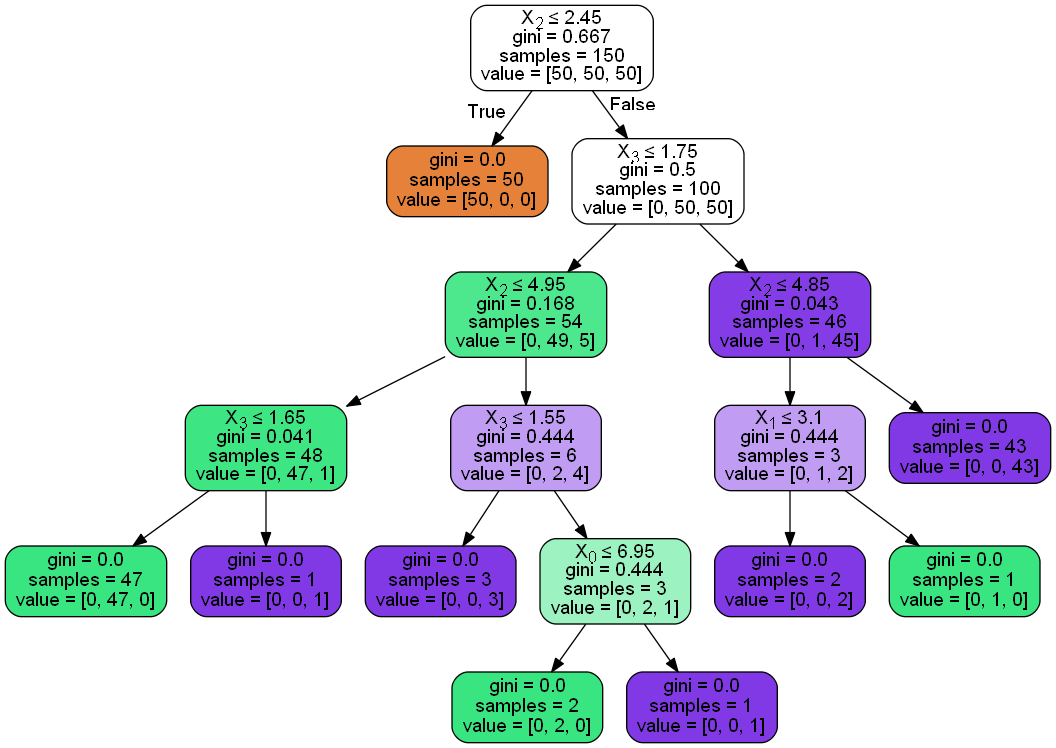

In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [104]:
import os
#os.chdir('/Users/rupesh.karn/Desktop/WorkPart-1/UNSW-NB15 Dataset')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

# Read in the training CSV file
print("Reading Training csv file.")
df1 = pd.read_csv("UNSW_NB15_training-set.csv")
df1.drop('label', axis=1, inplace=True)

obj_df=df1

obj_df["proto"] = obj_df["proto"].astype('category')
obj_df["service"] = obj_df["service"].astype('category')
obj_df["state"] = obj_df["state"].astype('category')
obj_df["proto_cat"] = obj_df["proto"].cat.codes
obj_df["service_cat"] = obj_df["service"].cat.codes
obj_df["state_cat"] = obj_df["state"].cat.codes

obj_df["proto"] = obj_df["proto_cat"]
obj_df["service"] = obj_df["service_cat"]
obj_df["state"] = obj_df["state_cat"]

obj_df.drop('proto_cat', axis=1, inplace=True)
obj_df.drop('service_cat', axis=1, inplace=True)
obj_df.drop('state_cat', axis=1, inplace=True)

Y_train_all_attacks = obj_df["attack_cat"]
obj_df=pd.get_dummies(obj_df, columns=["attack_cat"])


X_train = obj_df.values[:,:-10]

"""
for j in range(0,43):
    maximum = max(X_train[:,j])
    for i in range(0,len(X_train)):
        X_train[i,j] = round(X_train[i,j]/maximum,3)
"""
# Read in the testing CSV file 
print("Reading Testing csv file.")
df2 = pd.read_csv("UNSW_NB15_testing-set.csv")
df2.drop('label', axis=1, inplace=True)

obj_df2=df2

obj_df2["proto"] = obj_df2["proto"].astype('category')
obj_df2["service"] = obj_df2["service"].astype('category')
obj_df2["state"] = obj_df2["state"].astype('category')
obj_df2["proto_cat"] = obj_df2["proto"].cat.codes
obj_df2["service_cat"] = obj_df2["service"].cat.codes
obj_df2["state_cat"] = obj_df2["state"].cat.codes

obj_df2["proto"] = obj_df2["proto_cat"]
obj_df2["service"] = obj_df2["service_cat"]
obj_df2["state"] = obj_df2["state_cat"]

obj_df2.drop('proto_cat', axis=1, inplace=True)
obj_df2.drop('service_cat', axis=1, inplace=True)
obj_df2.drop('state_cat', axis=1, inplace=True)

Y_test_all_attacks = obj_df2["attack_cat"]
obj_df2=pd.get_dummies(obj_df2, columns=["attack_cat"])


X_test = obj_df2.values[:,:-10]

"""
for j in range(0,43):
    maximum = max(X_train[:,j])
    for i in range(0,len(X_test)):
        X_test[i,j] = round(X_test[i,j]/maximum,3)


estimators_number = list(range(10,30))
"""

dataspace = 0;
overall_accuracy_matrix = [None]*len(X_train)
iTERATION=0
dataspace_number=1
attack_type = 4
Y_train = obj_df.values[:,-attack_type]
Y_test = obj_df2.values[:,-attack_type]

cleanup_nums = {"Worms":0, "Shellcode":1, "Reconnaissance":2, "Normal":3, "Generic":4, "Fuzzers":5, "Exploits":6, "DoS":7, "Backdoor":8, "Analysis":9}
Y_train_all_attacks.replace(cleanup_nums,inplace=True)
Y_test_all_attacks.replace(cleanup_nums,inplace=True)

Reading Training csv file.
Reading Testing csv file.


In [5]:
import numpy as np
x = np.array([np.inf, -np.inf, np.nan, -128, 128]); print x.mean()

nan


In [7]:
x = np.nan_to_num(x); print x

[  1.79769313e+308  -1.79769313e+308   0.00000000e+000  -1.28000000e+002
   1.28000000e+002]


In [16]:
x=np.array([[1,2,3,4],[1,3,4,2],[4,3,0,9]])
x

array([[1, 2, 3, 4],
       [1, 3, 4, 2],
       [4, 3, 0, 9]])

In [17]:
np.argwhere(x > 3)

array([[0, 3],
       [1, 2],
       [2, 0],
       [2, 3]], dtype=int64)

In [1]:
import os
os.system('pip install causality')

0

In [6]:
import numpy
import pandas as pd

from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest

# generate some toy data:
SIZE = 2000
x1 = numpy.random.normal(size=SIZE)
x2 = x1 + numpy.random.normal(size=SIZE)
x3 = x1 + numpy.random.normal(size=SIZE)
x4 = x2 + x3 + numpy.random.normal(size=SIZE)
x5 = x4 + numpy.random.normal(size=SIZE)
x6 = x4 + x2+ numpy.random.normal(size=SIZE)

# load the data into a dataframe:
X = pd.DataFrame({'x1' : x1, 'x2' : x2, 'x3' : x3, 'x4' : x4, 'x5' : x5, 'x6' : x6})

# define the variable types: 'c' is 'continuous'. The variables defined here
# are the ones the search is performed over -- NOT all the variables defined
# in the data frame.
variable_types = {'x1' : 'c', 'x2' : 'c', 'x3' : 'c', 'x4' : 'c', 'x5' : 'c', 'x6' : 'c'}

# run the search
ic_algorithm = IC(RobustRegressionTest)
graph = ic_algorithm.search(X, variable_types)

In [7]:
graph.edges(data=True)

EdgeDataView([('x2', 'x1', {'arrows': [], 'marked': False}), ('x2', 'x6', {'arrows': [], 'marked': False}), ('x3', 'x1', {'arrows': [], 'marked': False}), ('x3', 'x4', {'arrows': [], 'marked': False}), ('x6', 'x4', {'arrows': [], 'marked': False}), ('x4', 'x5', {'arrows': [], 'marked': False})])

In [3]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in xrange(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

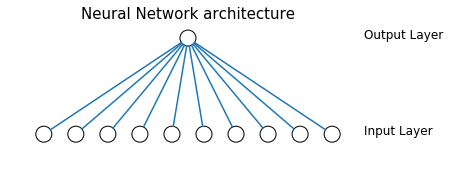

In [8]:
network = DrawNN( [10,1] )
network.draw()
pyplot.savefig('Neural-network-plot.pdf')

In [21]:
import os
os.system('pip install graphviz')

0

In [32]:
import networkx as nx
from matplotlib import pyplot as plt
G=nx.DiGraph()
G.add_node("a")
G.add_nodes_from(["b","c"])
G.add_edge(1,2)
edge = ("d", "e")
G.add_edge(*edge)
edge = ("a", "b")
G.add_edge(*edge)
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])
G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])


Nodes of graph: 
['a', 1, 'c', 'b', 'e', 'd', 2]
Edges of graph: 
[('a', 'b'), (1, 2), ('d', 'e')]


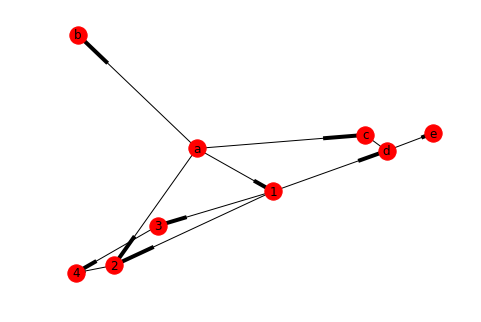

In [33]:
nx.draw(G, with_labels=True, arrows=True)
plt.savefig("simple_path.pdf") # save as png
plt.show() # display

In [34]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [35]:
G = nx.DiGraph()

G.add_node("ROOT")

for i in range(5):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=False, arrows=True)
plt.savefig('nx_test.png')

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [15]:
import numpy as np
a = np.array([[1, 2, 3, 4],[2, 4, 5, 6]])
np.savetxt("test.txt", a)
y = np.loadtxt("test.txt")
print(y)
type(y)

[[ 1.  2.  3.  4.]
 [ 2.  4.  5.  6.]]


numpy.ndarray